## Step 1. Setup 

In [6]:
%autosave 120
%matplotlib inline

Autosaving every 120 seconds


In [92]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [94]:
import tensorflow as tf
from tensorflow.keras import datasets

In [126]:
(img_train, label_train), (img_test, label_test) = datasets.imdb.load_data()

17465344/17464789 [==============================] - 4s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/pooja/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pooja/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

In [128]:
print('no of train examples :', img_train.shape[0], ' and shape :', img_train.shape)
print('no of test examples :', img_test.shape[0], ' and shape :', img_test.shape)
print('shape of train label, ',label_train.shape)
print('shape of test label, ',label_test.shape)
print('no of distinct label:', np.unique(label_train))

no of train examples : 25000  and shape : (25000,)
no of test examples : 25000  and shape : (25000,)
shape of train label,  (25000,)
shape of test label,  (25000,)
no of distinct label: [0 1]


In [129]:
label_train.conver

AttributeError: 'numpy.ndarray' object has no attribute 'conver'

In [112]:
list(set(label_train))


<function list.count(value, /)>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input

## Step 2. dataset

In [2]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## upload cats_vs_dogs dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
# When you do isfile(), you are performing the lookup in the current directory. 
# You have to os.path.join() the i with the filename in the isfile() call.

if os.path.exists("/tmp/cats_and_dogs_filtered/"):
  print('>>>>>>>>>>>>>>> Dataset exist:', os.listdir('/tmp/cats_and_dogs_filtered/'))
else:
  print('>>>>>>>>>>>>>> Uploading dataset========') 
  !wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()
  print('data is uploaded ========>', os.listdir('/tmp/cats_and_dogs_filtered'))  

>>>>>>>>>>>>>>> Dataset exist: ['vectorize.py', 'train', 'validation']


In [51]:
basedir = "/tmp/cats_and_dogs_filtered/"
train_dir = os.path.join(basedir, 'train')
test_dir  = os.path.join(basedir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

train_cats_fnames= os.listdir(train_cats_dir)
train_dogs_fnames =os.listdir(train_dogs_dir)

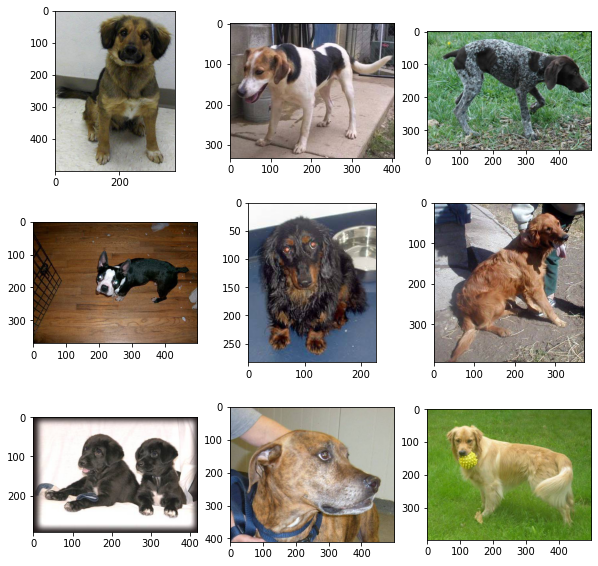

In [31]:
## Lets check the cats and dogs datasets
fig=plt.figure(figsize=(10, 10))
indx =34
n_col=3
n_row=3
for i,indx in enumerate(train_dogs_fnames[indx:indx+9]):
    image_path = os.path.join(train_dogs_dir, indx)
    fig.add_subplot(n_row, n_col, i+1)
    img= image.load_img(image_path)
    plt.imshow(img)
    plt.axis(True)

plt.show()

In [33]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 30s 0us/step


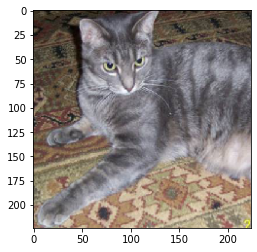

In [86]:
indx=30
single_image_path = os.path.join(train_cats_dir, train_cats_fnames[indx])
img = image.load_img(single_image_path, target_size=(224, 224))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [87]:
pred=model.predict(img)
print('Predicted: ', decode_predictions(pred, top=1)[0])

Predicted:  [('n02123045', 'tabby', 0.5500886)]
